In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataframe setting
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

# data load
base_path = "/Users/krc/Documents/dev/pubgML12/"
# base_path = "/content/drive/MyDrive/Colab Notebooks/미니프로젝트_pubg"
data = pd.read_csv(base_path +"train_V2.csv")
df = data.copy()

df

pandas version:  1.4.2


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


### pubg EDA - 희수

#### 한 경기 참가자수 보다 1인 최대 킬수가 더 많은 게임들 - 행 삭제

In [3]:
# 같은 게임에 참여한 사람 수 컬럼 수 만듦
df.loc[:,'num']=df.groupby('matchId')['Id'].transform('count')
# 한 게임에서 최대 킬수 컬럼
df.loc[:,'max']=df.groupby('matchId')['kills'].transform('max')

df.loc[df['num']<=df['max'],['num','max']]

,num,max
1292,32,38
2769,11,23
5479,8,17
6673,42,49
11892,21,25
...,...,...
4434989,16,26
4435441,14,16
4438715,13,17
4440927,47,55


In [8]:
# 최대 킬수가 한 게임 사람 수 보다 많을 수 없음 -> 2124 case 확인 -> drop
df=df[df['num']>df['max']]
df = df.drop(['num','max'], axis =1)

#### maxPlace기준으로 numGroups 수정 필요

In [4]:
# 한 팀에 팀원이 4명을 초과하는 팀 존재 
groupId_idx = df.loc[:,'groupId'].value_counts().to_frame()
groupId_idx[groupId_idx.groupId>4].value_counts()

groupId
5          53426
6          25875
7          14788
8           8422
9           4832
10          2935
11          1812
12          1134
13           812
14           562
15           343
16           229
17           154
18           112
19            61
20            22
21            17
22            17
23             7
26             5
24             3
25             2
27             2
28             2
31             1
36             1
49             1
64             1
72             1
74             1
dtype: int64

In [5]:
# df.loc[df.groupId == '14d6b54cdec6bc','matchId'].value_counts() 
# matchId -> 'b30f3d87189aa6', matchType -> normal-squad-fpp
df.loc[df.matchId== 'b30f3d87189aa6','groupId'].value_counts()
# 2팀 밖에 없는데 팀 당 인원이 비정상적 

14d6b54cdec6bc    74
0aef53445f8793    15
Name: groupId, dtype: int64

In [6]:
# df[df.groupId == 'b8275198faa03b'].head()
# matchId -> '3e029737889ce9', matchType -> duo-fpp	
df.loc[df.matchId== '3e029737889ce9','groupId'].value_counts()
# api 문제로 보임

b8275198faa03b    72
027acbdefaabeb     5
08377106391dc7     2
014d49e075248d     2
0b3fba262a4732     2
3d8cc0f335a2f0     2
cd04ba200d96f3     2
7f88776566d32c     2
c0c6410068769c     2
ab0b8f414d366c     2
ebae3dbb387bd2     2
f0a89af587b46e     2
76fcb3774711a9     1
515e10595b81ee     1
Name: groupId, dtype: int64

팀원 수가 정상이 아닌 이유
1. 커스텀 게임 - 대부분의 경우
2. api문제 : 두 팀을 한 그룹으로 묶어버림
3. 드문 확률로 한 팀이 5명 이상으로 플레이 - 버그

결론 : matchId는 오류가 많아서 열 삭제 필요, maxPlace, numGroup조정 필요
1. 참가 인원에 비해 팀 수가 너무 적은 경우
2. maxPlace와 numGroups가 너무 많이 차이나는 경우

-> 조정하는 코드는 machine_learning/src/feature/outlier_detection.py 확인

#### points 분석

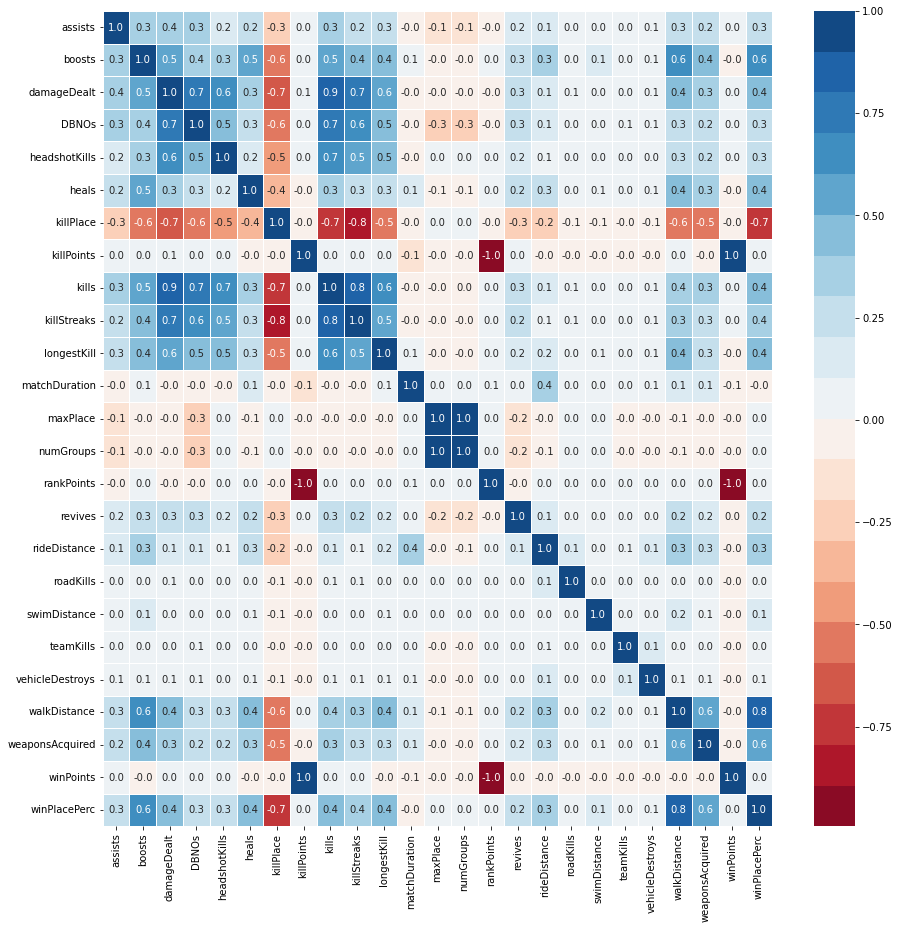

In [9]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

plt.show()

In [23]:
# df[(df.killPoints==0)&(df.rankPoints==-1)]
# df[(df.winPoints==0)&(df.rankPoints==-1)]
# df[(df.killPoints!=0)&(df.rankPoints>0)]
# df[(df.winPoints!=0)&(df.rankPoints>0)]

# 전부 결과 없음 -> win & killPoints 또는 rankPoints 둘 중 하나만 존재

In [11]:
# 파생 feature 생성
df['healthitems'] = df['heals'] + df['boosts']
df['totalDistance'] = df['rideDistance'] + df["walkDistance"] + df["swimDistance"]
df["skill"] = df["headshotKills"] + df["roadKills"]

In [15]:
idx_nm = df[(df.killPoints>0)&(df.winPoints>0)]
idx_nm[['rankPoints','killPoints','winPoints']].describe()

,rankPoints,killPoints,winPoints
count,1.790311e+06,1.790311e+06,1.790311e+06
mean,-9.500534e-01,1.253825e+03,1.505546e+03
std,2.178348e-01,1.972367e+02,6.867584e+01
min,-1.000000e+00,1.340000e+02,3.210000e+02
25%,-1.000000e+00,1.090000e+03,1.480000e+03
50%,-1.000000e+00,1.240000e+03,1.500000e+03
75%,-1.000000e+00,1.387000e+03,1.530000e+03
max,0.000000e+00,2.170000e+03,2.013000e+03


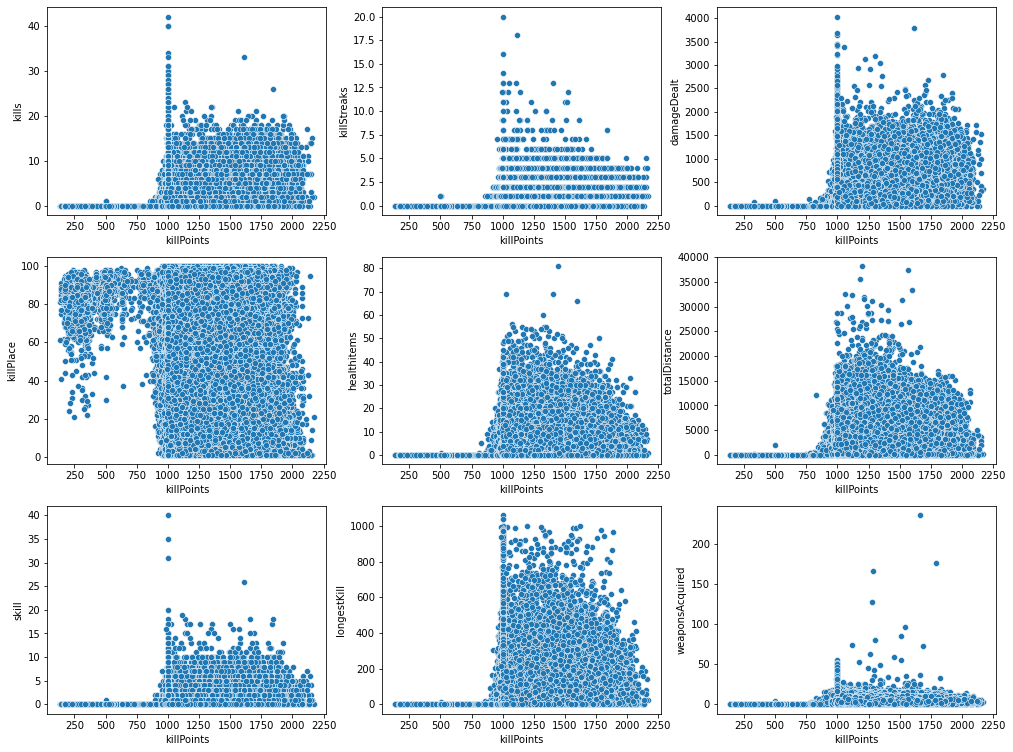

In [20]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm, x="killPoints", y='kills')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm, x="killPoints", y='killStreaks')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm, x="killPoints", y='damageDealt')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm, x="killPoints", y='killPlace')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm, x="killPoints", y='healthitems')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm, x="killPoints", y='totalDistance')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm, x="killPoints", y='skill')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm, x="killPoints", y='longestKill')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm, x="killPoints", y='weaponsAcquired')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

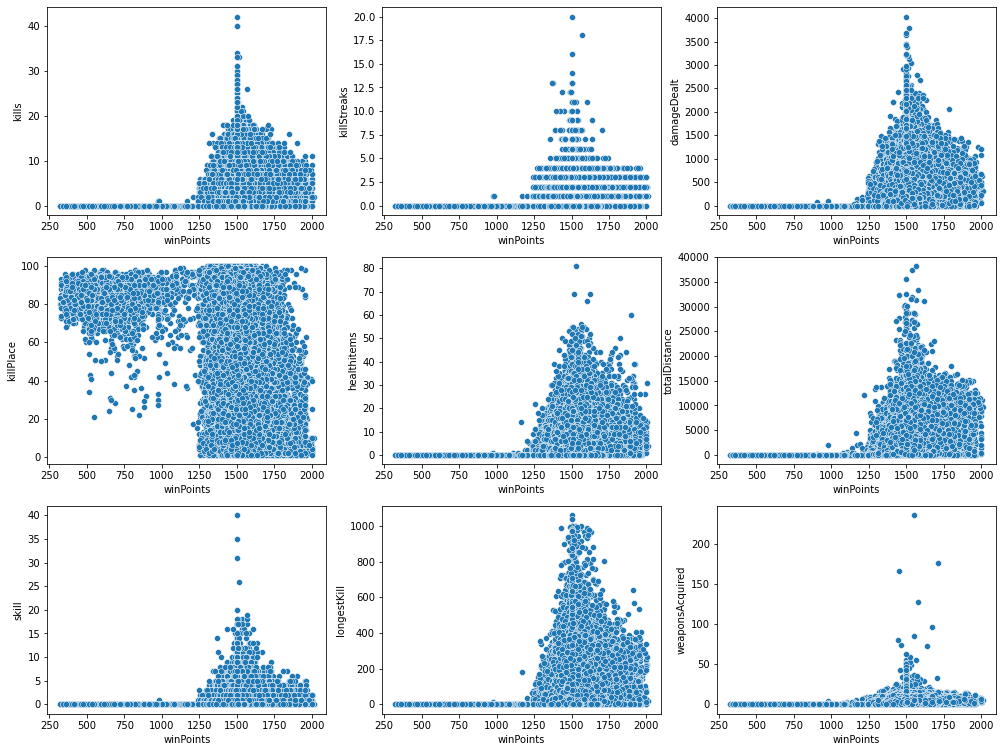

In [21]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm, x="winPoints", y='kills')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm, x="winPoints", y='killStreaks')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm, x="winPoints", y='damageDealt')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm, x="winPoints", y='killPlace')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm, x="winPoints", y='healthitems')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm, x="winPoints", y='totalDistance')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm, x="winPoints", y='skill')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm, x="winPoints", y='longestKill')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm, x="winPoints", y='weaponsAcquired')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

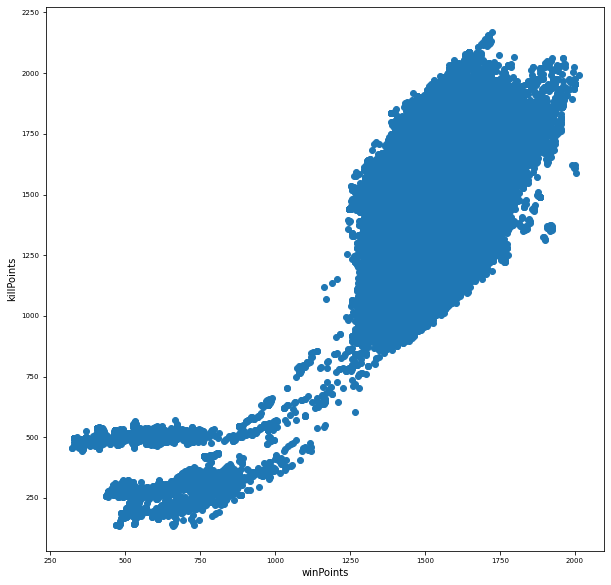

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(idx_nm['winPoints'],idx_nm['killPoints'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('winPoints')
plt.ylabel('killPoints')
plt.show()

- 두 포인트 다 뚜렷한 인사이트를 도출할 수 없다.
- killPoints는 1240점 , winPoints는 1500점을 기본 점수로 설정한 듯 하다.

In [24]:
idx_nm_1 = df[df.rankPoints > 0]
idx_nm_1['rankPoints'].value_counts()

1500    298625
1480     48857
1494     42612
1490     42254
1497     40174
         ...  
2588         1
2969         1
4450         1
2430         1
2962         1
Name: rankPoints, Length: 2260, dtype: int64

In [25]:
idx_nm_1[['rankPoints','killPoints','winPoints']].describe()

,rankPoints,killPoints,winPoints
count,2.654531e+06,2654531.0,2654531.0
mean,1.494339e+03,0.0,0.0
std,8.960227e+01,0.0,0.0
min,1.000000e+02,0.0,0.0
25%,1.465000e+03,0.0,0.0
50%,1.496000e+03,0.0,0.0
75%,1.513000e+03,0.0,0.0
max,5.910000e+03,0.0,0.0


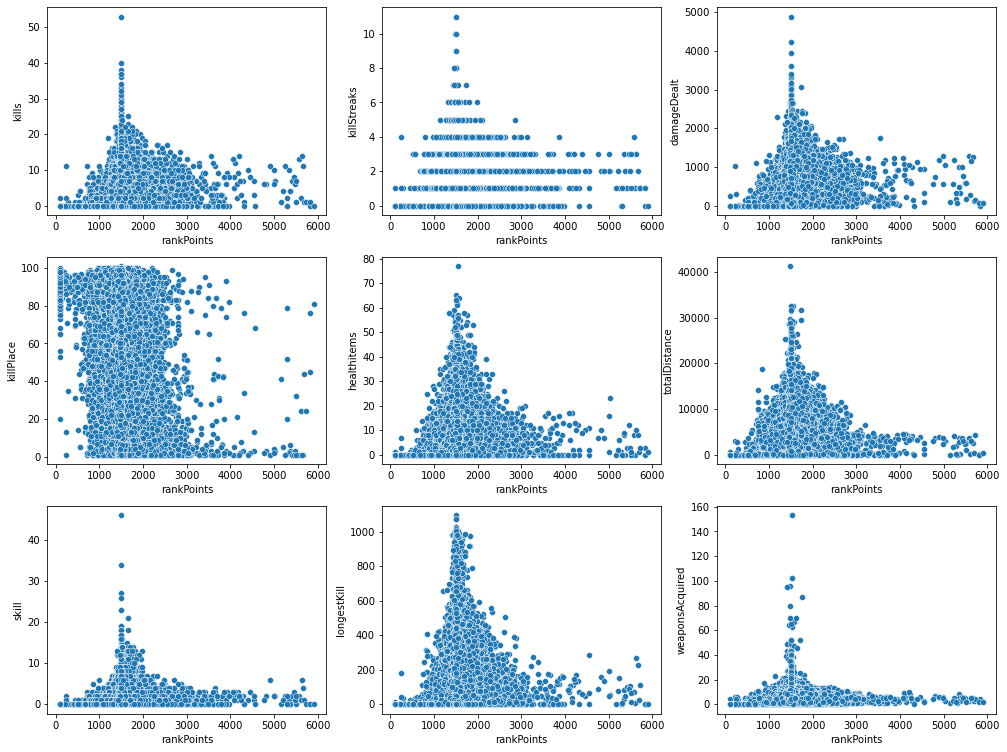

In [28]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='kills')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='killStreaks')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='damageDealt')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='killPlace')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='healthitems')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='totalDistance')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='skill')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='longestKill')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='weaponsAcquired')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

- -1(none),0(none),1500(중간값)
- 상위 랭커들은 운영적으로 해서 많이 분산된 반면 1500점대 유저들은 전략이 부족하다보니 운이나 실력등이 산재되어 있는듯하다. 
- 또한 시즌이 바뀌면서 오랜만에 들어오지만 게임을 잘하는 경우는 제대로 rankPoints가 반영이 안되어 있는 듯 하다.
- 상위 랭커들은 winPlace를 통해 다시 분석할 필요가 있다.

In [32]:
# MinMaxScaler로 정규화
df_Points = df[['killPoints','winPoints','rankPoints','damageDealt']]
from sklearn.preprocessing import MinMaxScaler

feature_names = ['killPoints','winPoints','rankPoints','damageDealt']

scaler = MinMaxScaler()
scaler.fit(df_Points)
points_scaled = scaler.transform(df_Points)
points_df_scaled = pd.DataFrame(data=points_scaled, columns=feature_names)
points_df_scaled

,killPoints,winPoints,rankPoints,damageDealt
0,0.571889,0.728266,0.000000,0.000000
1,0.000000,0.000000,0.251227,0.018709
2,0.000000,0.000000,0.252411,0.013909
3,0.000000,0.000000,0.238369,0.006729
4,0.000000,0.000000,0.264084,0.020454
...,...,...,...,...
4444837,0.474194,0.748634,0.000000,0.000000
4444838,0.000000,0.000000,0.254103,0.009030
4444839,0.000000,0.000000,0.253933,0.012080
4444840,0.000000,0.000000,0.240061,0.036899


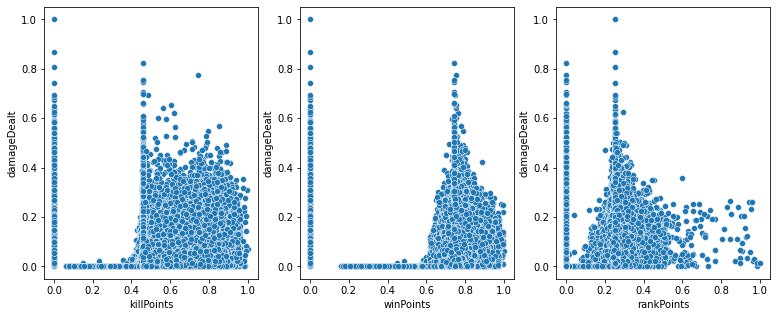

In [33]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.scatterplot(data = points_df_scaled, x="killPoints", y='damageDealt')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(1,3,2)
sns.scatterplot(data = points_df_scaled, x="winPoints", y='damageDealt')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(1,3,3)
sns.scatterplot(data = points_df_scaled, x="rankPoints", y='damageDealt')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.show()

- 밀집 구간, 수치, 경향 모든게 달라서 컬럼 자체를 사용하기 어려움
- 나중에 결론 부분에서 활용 가능성 모색
- 전부 컬럼 드롭